In [1]:
a = 3.5678
b = -a
print(a, a%1)
print(b, b%1)

3.5678 0.5678000000000001
-3.5678 0.4321999999999999


In [1]:
from pathlib import Path

import importlib
import pkgutil
import torch

import asynctorch_experiments.buildtools.better_paths
import asynctorch_experiments.buildtools.experiment
import asynctorch_experiments.n_mnist.experiment_dicts
%load_ext autoreload

/home/jortg/Documents/uni/master/thesis/code/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


device: cuda
/home/jortg/Documents/uni/master/thesis/code/asynctorch_experiments/src/asynctorch_experiments
Starting Experiment (mubrain_compare_quantized_membrane_sanity_check)
(cuda) Performing a pseudo run (F 128)
attempting to init MubrainIFState
Registring input monitor
Registring spike monitor
Registring weight monitor


  0%|          | 0/938 [00:00<?, ?it/s]

initializing membrane buffer (256x74)


 11%|█         | 100/938 [00:04<00:39, 20.95it/s]


plotting monitors...
input monitor:


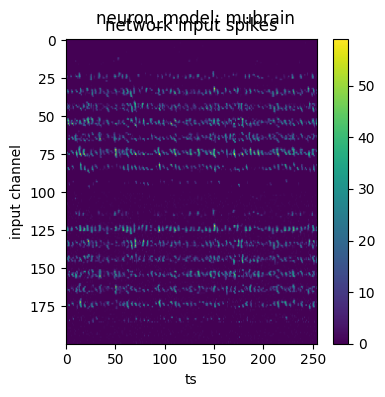

spike monitor:


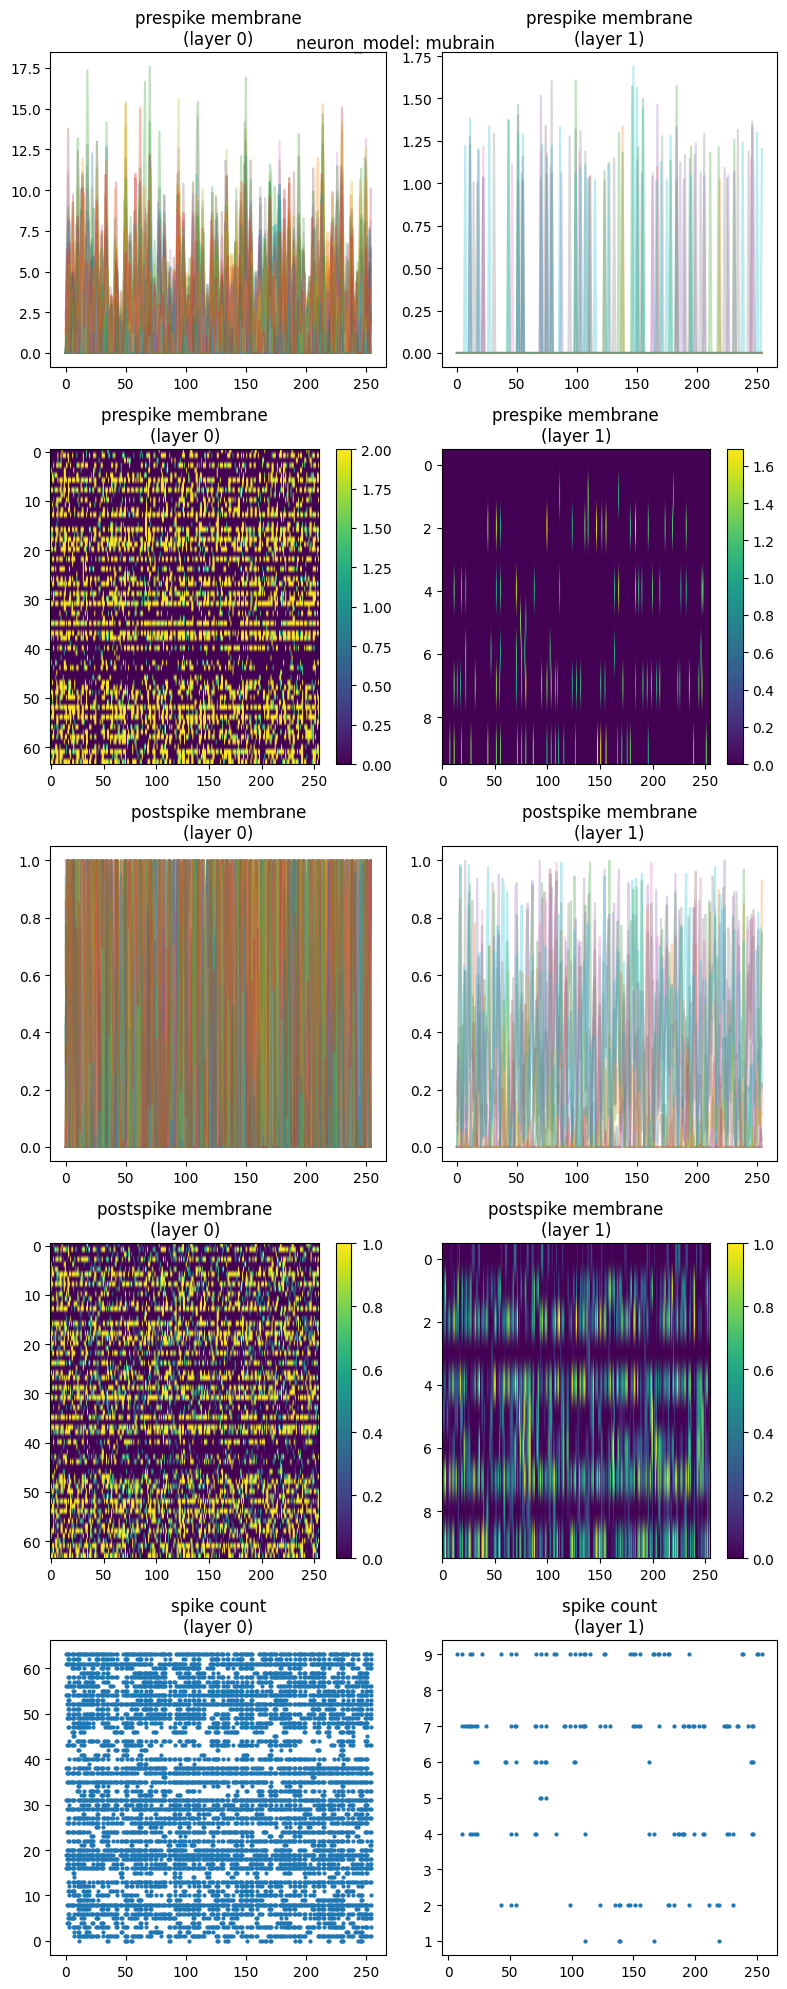

weight monitor:


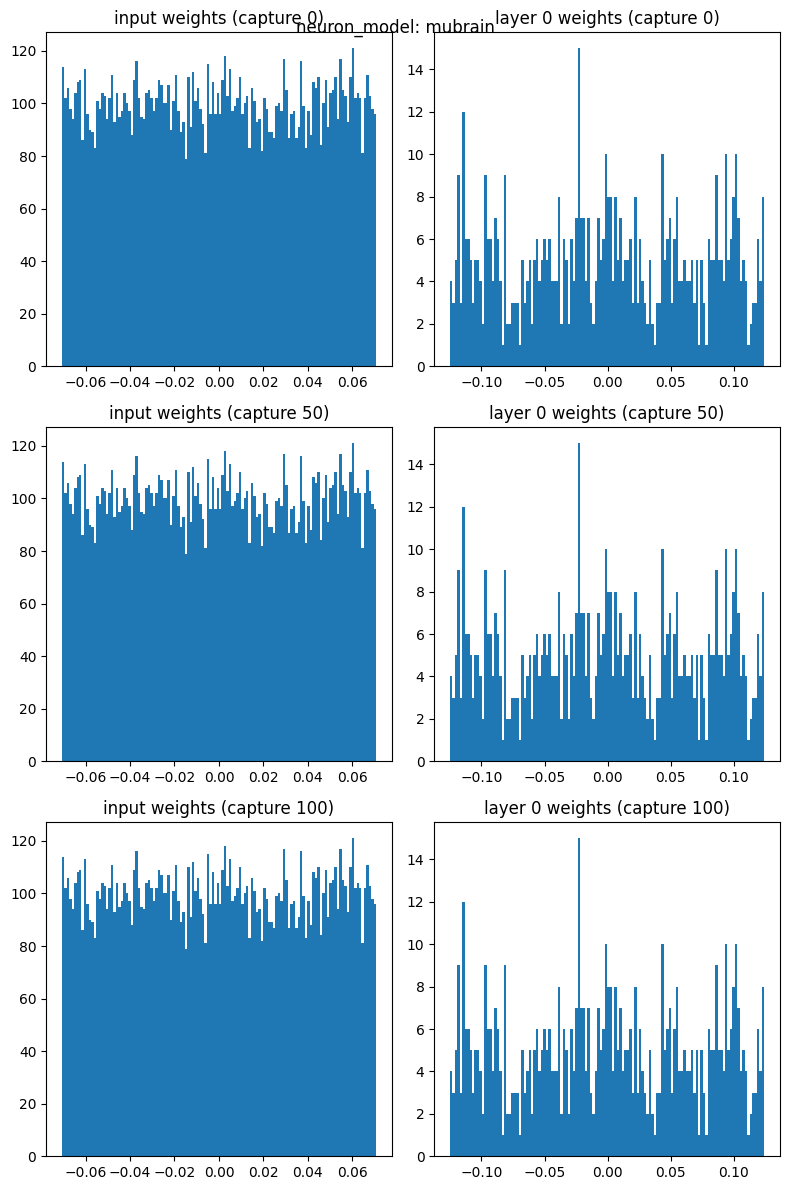

(cuda) Performing a pseudo run (F 128)
Registring input monitor
Registring spike monitor
Registring weight monitor


  0%|          | 0/938 [00:00<?, ?it/s]

initializing membrane buffer (256x74)


 11%|█         | 100/938 [00:04<00:37, 22.07it/s]


plotting monitors...
input monitor:


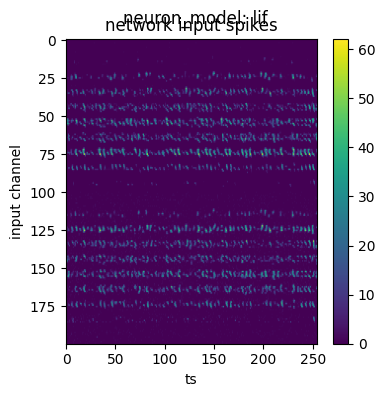

spike monitor:


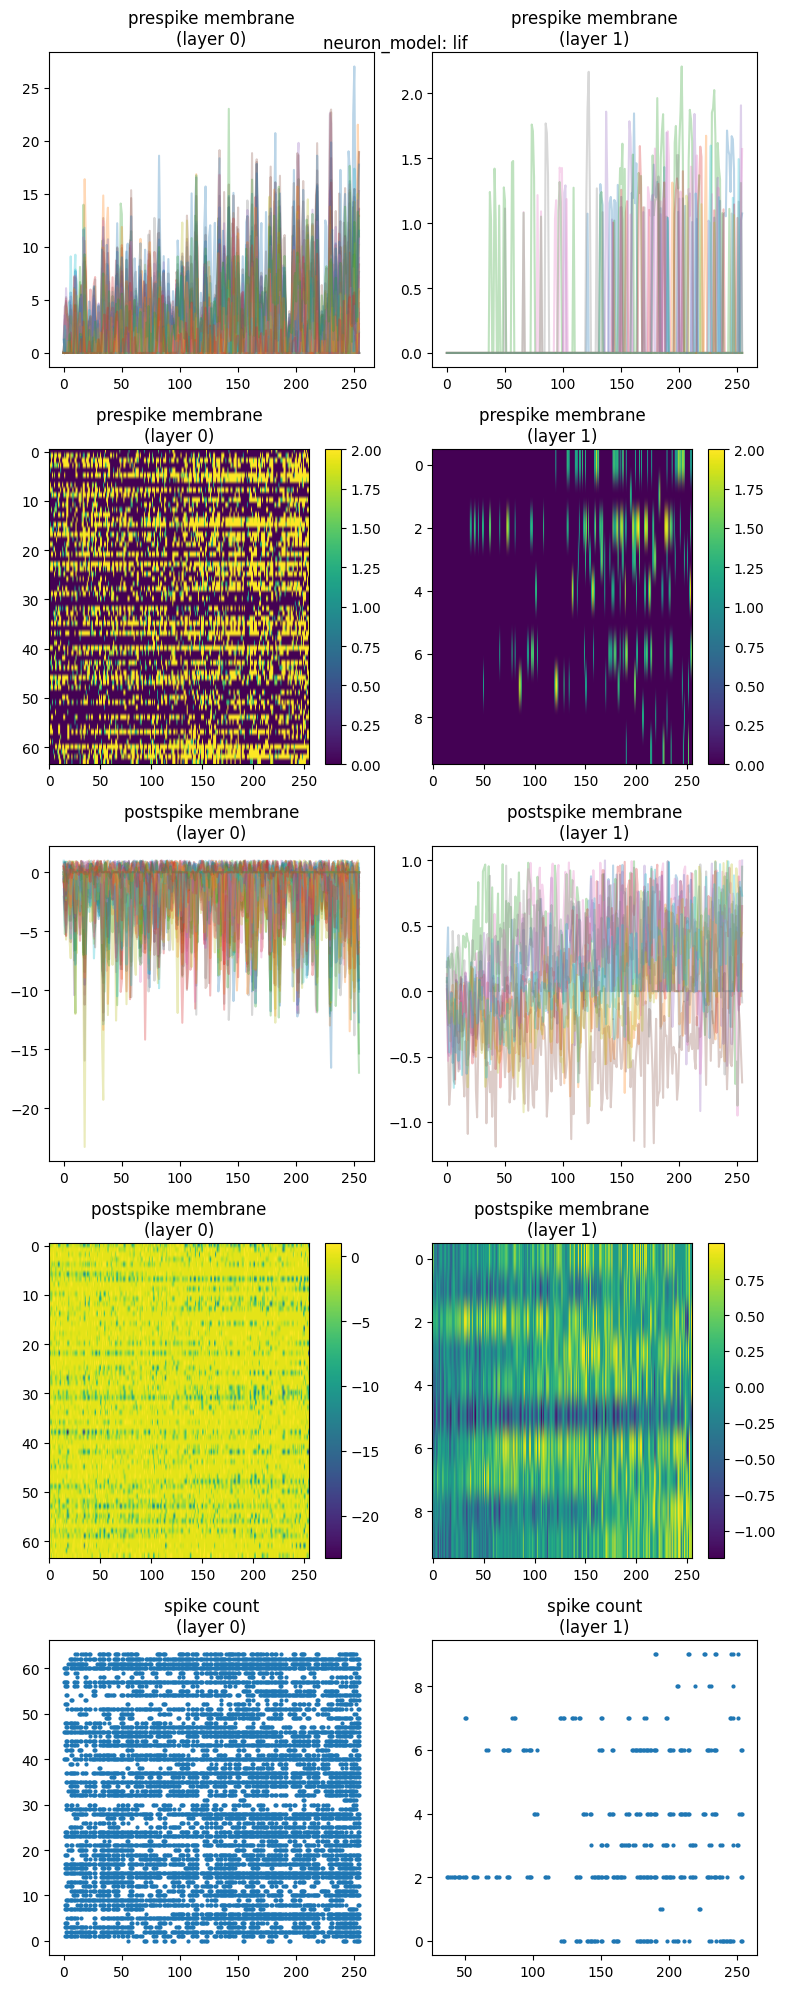

weight monitor:


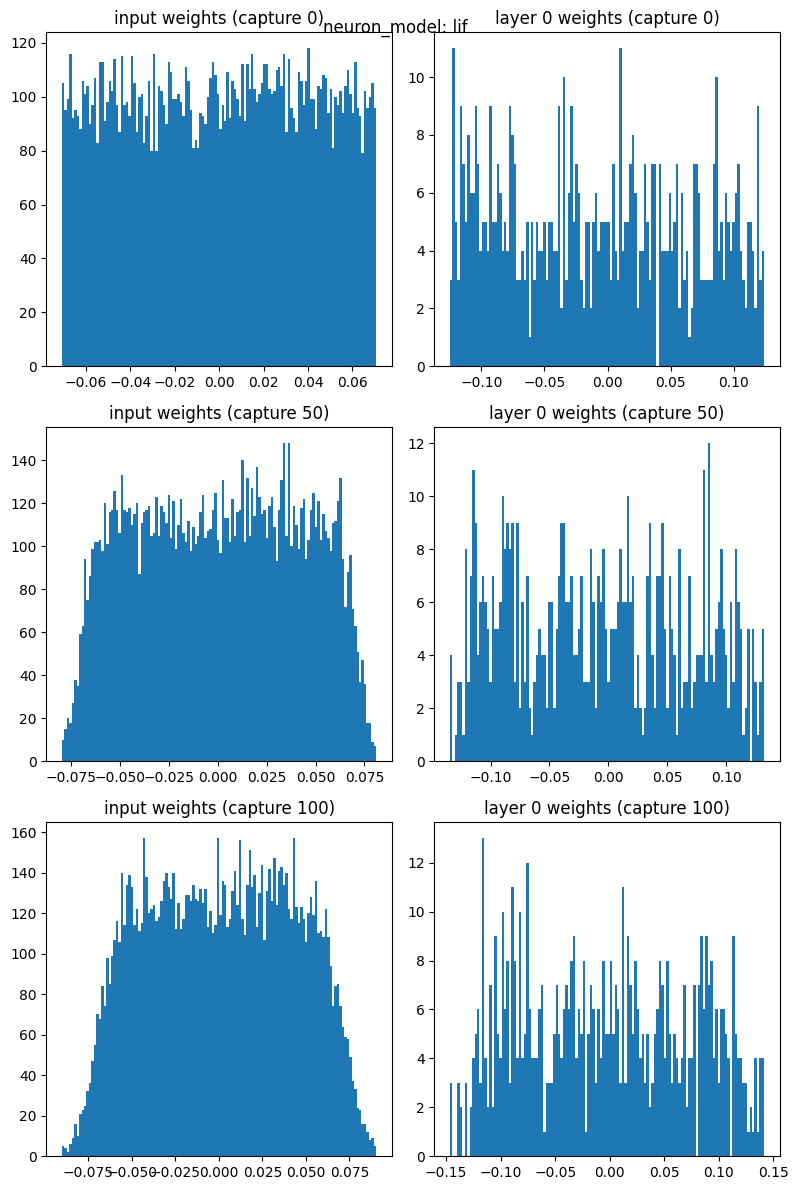

Starting Experiment (mubrain_compare_quantized_membrane_sanity_check)
-> [unit 1/2] - (F_train: 1/1, param: 1/2, trial: 1/1)
(cuda) Training (F_train 128; epoch 1)
attempting to init MubrainIFState


100%|██████████| 938/938 [00:41<00:00, 22.51it/s]


(cuda) Testing F_test 128 (F_train 128; epoch 1)
attempting to init MubrainIFState


100%|██████████| 157/157 [00:06<00:00, 25.60it/s]


	acc: 0.099
(ep 1)    128: 0.099 (1/1)
-
-> [unit 2/2] - (F_train: 1/1, param: 2/2, trial: 1/1)
(cuda) Training (F_train 128; epoch 1)


100%|██████████| 938/938 [00:23<00:00, 39.87it/s]


(cuda) Testing F_test 128 (F_train 128; epoch 1)


100%|██████████| 157/157 [00:03<00:00, 49.04it/s]


	acc: 0.909
(ep 1)    128: 0.909 (1/1)
-


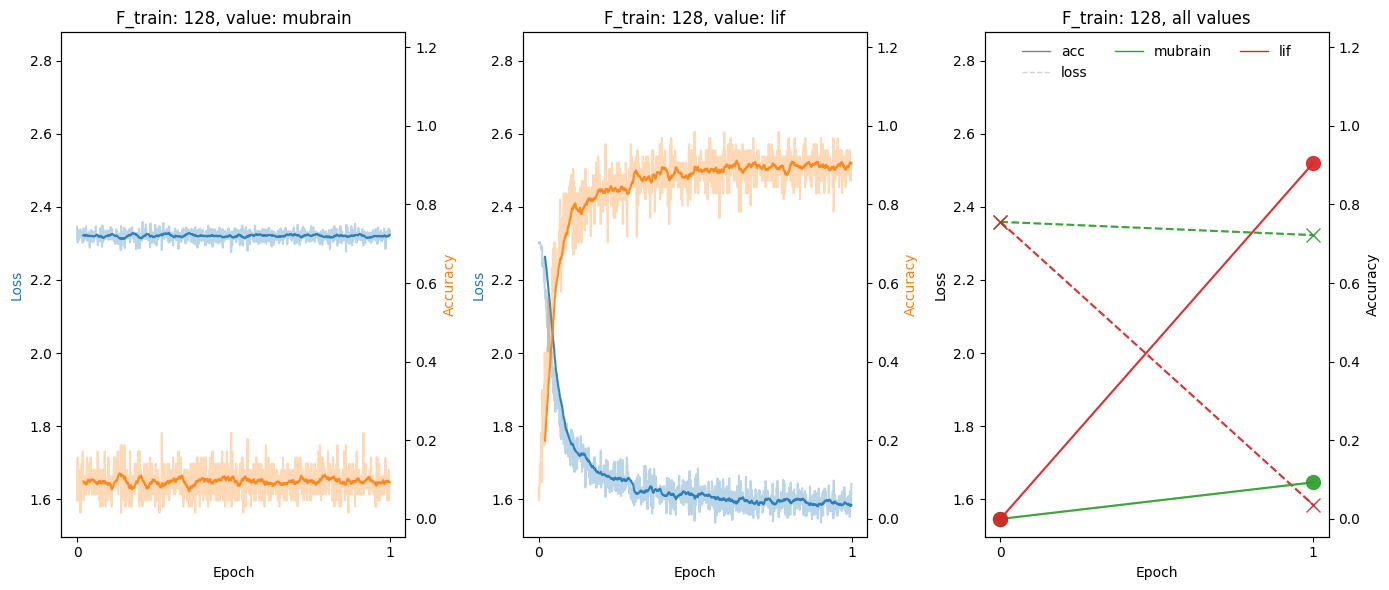

Starting Experiment (mubrain_compare_quantized_membrane_sanity_check)
(cuda) Training (F_train 128; epoch 1)
attempting to init MubrainIFState


100%|██████████| 938/938 [00:25<00:00, 37.47it/s]


(cuda) Performing a pseudo run (F 128)
attempting to init MubrainIFState
Registring input monitor
Registring spike monitor
Registring weight monitor


  3%|▎         | 4/157 [00:00<00:04, 34.44it/s]

initializing membrane buffer (256x74)


 64%|██████▎   | 100/157 [00:02<00:01, 45.39it/s]


	acc: 0.105, loss: 2.334
plotting monitors...
input monitor:


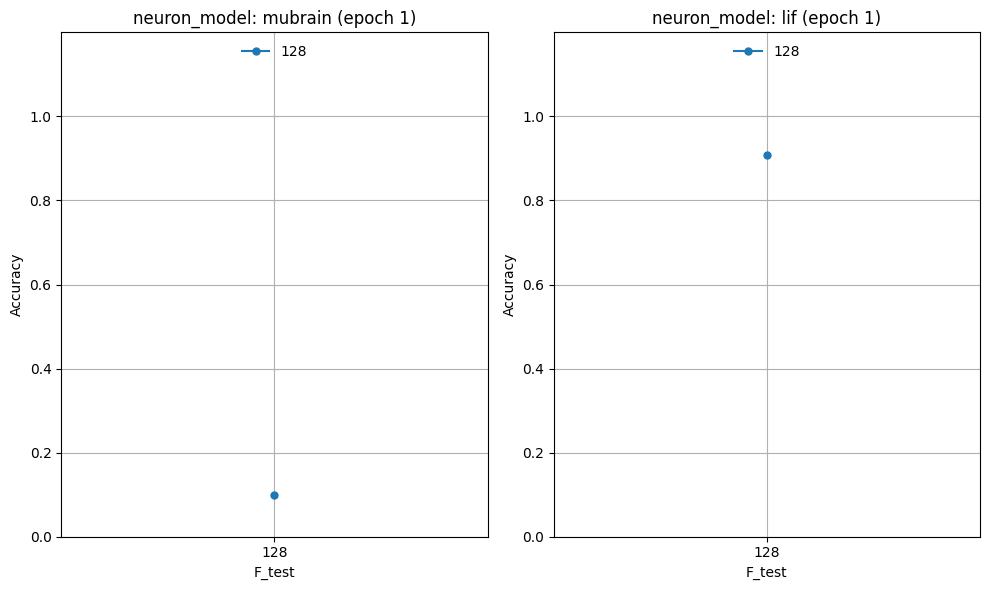

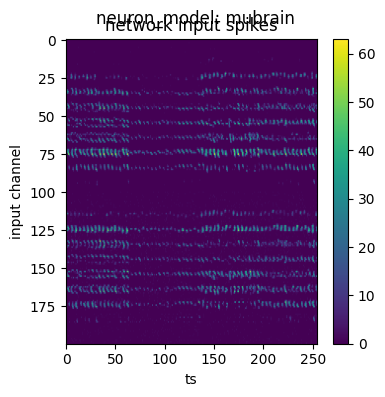

spike monitor:


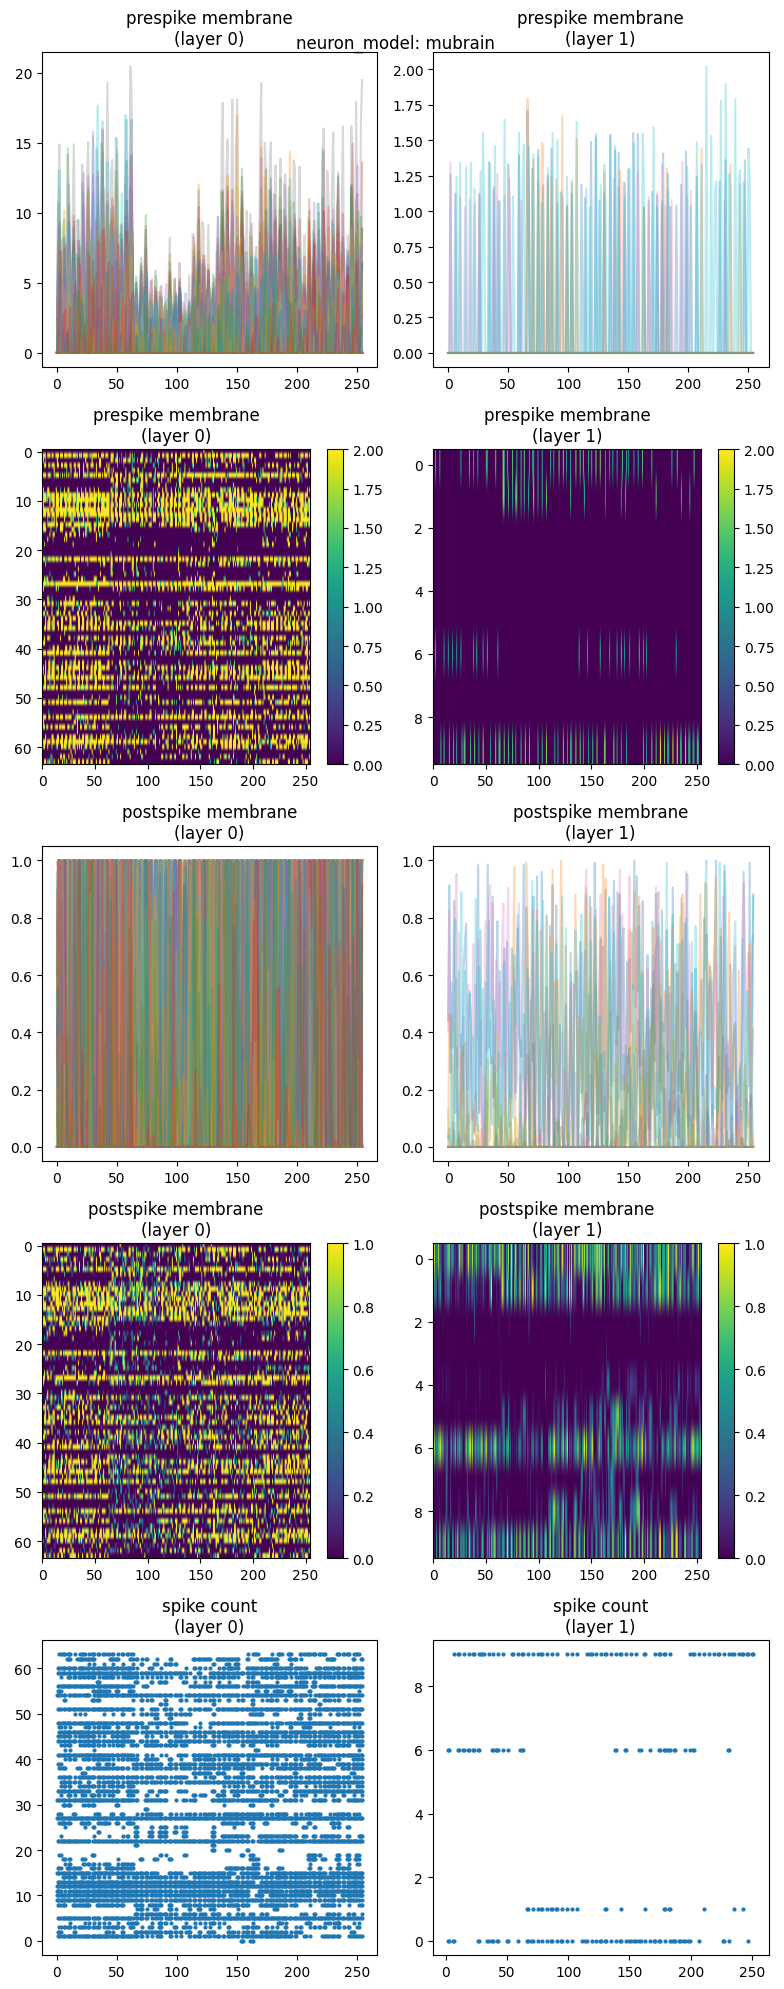

weight monitor:


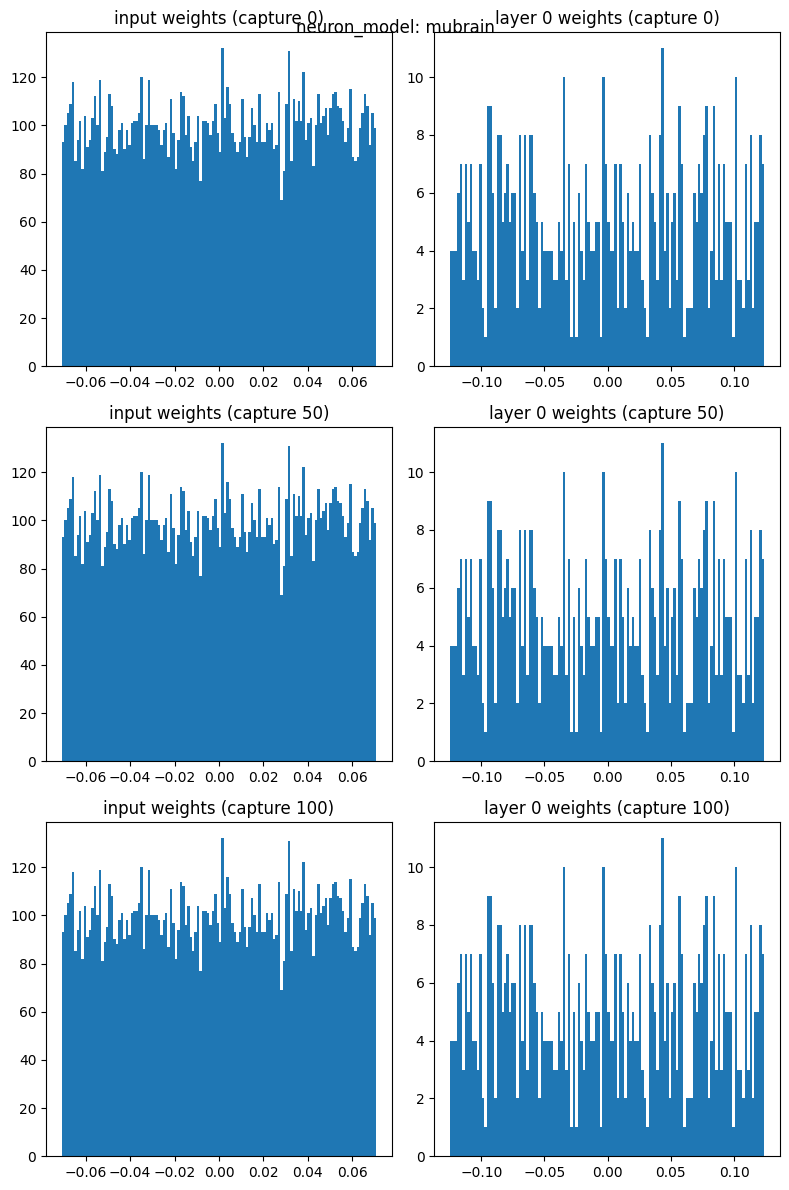

(cuda) Training (F_train 128; epoch 1)


 50%|█████     | 472/938 [00:12<00:12, 37.83it/s]


KeyboardInterrupt: 

In [2]:

%autoreload 2


MyPath = asynctorch_experiments.buildtools.better_paths.MyPath
Experiment = asynctorch_experiments.buildtools.experiment.Experiment
EXPERIMENTS = asynctorch_experiments.n_mnist.experiment_dicts.EXPERIMENTS
from asynctorch_experiments.evaluation.monitor import Monitor, InputMonitor, TestMonitor, SpikeMonitor, WeightMonitor,  MembraneMonitor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'device: {device}')

project_path = MyPath(Path().resolve()).change_dir('..')
print(project_path)



purge_old=True
verbose=False




monitors = [
    InputMonitor,
    SpikeMonitor,
    WeightMonitor,
]


########## Only Change These ###########
exp_name = 'mubrain_compare_quantized_membrane_sanity_check'

do_pseudo_runs=True

only_do_pseudo_run= False

pseudoruns=100
if do_pseudo_runs:
    purge_old=True
########################################
if only_do_pseudo_run:
    Experiment.run_experiment(
            experiments=EXPERIMENTS,
            exp_name=exp_name,
            project_path=project_path,
            purge_old=purge_old,
            override_verbose=verbose,
            override_device=device,
            monitors=monitors,
            train_before_pseudo=False,
            pseudorun=pseudoruns,
            pseudo_mode='train',
            pseudo_string='before'
        )
else:
    if do_pseudo_runs:
        # train_pseudo_run on untrained model
        Experiment.run_experiment(
            experiments=EXPERIMENTS,
            exp_name=exp_name,
            project_path=project_path,
            purge_old=purge_old,
            override_verbose=verbose,
            override_device=device,
            monitors=monitors,
            train_before_pseudo=False,
            pseudorun=pseudoruns,
            pseudo_mode='train',
            pseudo_string='before'
        )
    # perform regular experiment
    Experiment.run_experiment(
        experiments=EXPERIMENTS,
        exp_name=exp_name,
        project_path=project_path,
        purge_old=purge_old,
        override_verbose=verbose,
        override_device=device,
        monitors=monitors,
        train_before_pseudo=False,
        pseudorun=False,
        pseudo_mode='train'
    )
    if do_pseudo_runs:
        Experiment.run_experiment(
            experiments=EXPERIMENTS,
            exp_name=exp_name,
            project_path=project_path,
            purge_old=purge_old,
            override_verbose=verbose,
            override_device=device,
            monitors=monitors,
            train_before_pseudo=True,
            pseudorun=pseudoruns,
            pseudo_mode='test',
            pseudo_string='after'
        )

In [2]:
import numpy as np
weights = np.random.normal(0, 1)

n_bits = 4
n_vals = 2**n_bits-1
zero_point = 0
min_weight = -n_vals//2+1
max_weight = n_vals//2
print(n_vals)

print(min_weight)
print(max_weight)

15
-7
7
